<a href="https://colab.research.google.com/github/LNSHRIVAS/Error-Analysis-and-Ensemble-Learning-with-Bootstrap-Sampled-Neural-Networks/blob/main/Error_Analysis_and_Ensemble_Learning_with_Bootstrap_Sampled_Neural_Networks.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Information about the data contained in the file moonDataset . csv' . The first three columns
contain the values of three features, and the fourth column has the label (either O or I). It consists of
200 samples. We will need to partition the dataset into two datasets. The first 150 samples will be
used for training and the remaining 50 samples will be used for testing.

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [3]:
moon_data = pd.read_csv('path_to_data.csv')

In [4]:
print(moon_data.head())

         X1        X2        X3  label
0 -0.926767 -0.111073  0.086017      0
1 -0.917583  0.706006  0.058041      0
2  0.437984  0.899093  0.072543      0
3  0.089694  0.291446  0.070444      1
4  0.110672 -0.070806 -0.090376      1


In [45]:
moon_train, moon_test = moon_data[:150], moon_data[150:]
moon_test = np.array(moon_test)

In [33]:
len(moon_train), len(moon_test)

(150, 50)

(a) Starting with the training dataset with 150 samples, construct 50 training datasets (with 150
samples in each) using bootstrap method.

In [35]:
#Using bootstrap method we will construct another 50 different dataset.

Number_of_datasets = 50
bootstrap_dataset = []

for i in range(Number_of_datasets):
  sample = moon_train.sample(n=len(moon_train), replace=True)
  sample = np.array(sample)
  bootstrap_dataset.append(sample)

In [36]:
print(len(bootstrap_dataset))

50


(b) For each of the 50 datasets from part (a), construct a feedforward network with one hidden layer
consisting of IO hidden nodes, and train it using the dataset for binary classification. We will Compute
the error rate of the neural network using the test dataset with 50 samples, and plot the histogram
of the error rates for the 50 neural networks.

In [41]:
#Functions

def relu(x):
  return np.maximum(0,x)

def sigmoid(x):
  return 1/(1+np.exp(-x))

def initialize_parameters(n_x, n_h, n_y):
  np.random.seed(42)
  W1 = np.random.randn(n_h, n_x)
  b1 = np.zeros((n_h, 1))
  W2 = np.random.randn(n_y, n_h)
  b2 = np.zeros((n_y, 1))
  return W1, b1, W2, b2

def forward_propagation(X, W1, b1, W2, b2):
  Z1 = np.dot(W1, X) + b1
  A1 = relu(Z1)
  Z2 = np.dot(W2, A1) + b2
  A2 = sigmoid(Z2)
  return Z1, A1, Z2, A2

def backward_propagation(X, Y, Z1, A1, Z2, A2, W1, b1, W2, b2):
  m = X.shape[1]

  dZ2 = A2 - Y
  dW2 = (1 / m) * np.dot(dZ2, A1.T)
  db2 = (1 / m) * np.sum(dZ2, axis=1, keepdims=True)

  dA1 = np.dot(W2.T, dZ2)
  dZ1 = dA1 * (Z1 > 0)

  dW1 = (1 / m) * np.dot(dZ1, X.T)
  db1 = (1 / m) * np.sum(dZ1, axis=1, keepdims=True)

  return dW1, db1, dW2, db2

def update_parameters(W1, b1, W2, b2, dW1, db1, dW2, db2, learning_rate):
    W1 = W1 - learning_rate * dW1
    b1 = b1 - learning_rate * db1
    W2 = W2 - learning_rate * dW2
    b2 = b2 - learning_rate * db2
    return W1, b1, W2, b2

def get_predictions(A2):
  return np.round(A2)

def get_accuracy(predictions, Y):
  print(predictions, Y)
  return np.sum(predictions == Y) / Y.size


In [69]:
#Feed forward neural network

hidden_units = 10
learning_rate = 0.01
epochs = 10000

error_list = []

for dataset in bootstrap_dataset:
    x_train, y_train = dataset[:, :-1].T, dataset[:, -1:].T

    W1, b1, W2, b2 = initialize_parameters(x_train.shape[0], hidden_units, y_train.shape[0])

    for epoch in range(epochs):
        Z1, A1, Z2, A2 = forward_propagation(x_train, W1, b1, W2, b2)
        dW1, db1, dW2, db2 = backward_propagation(x_train, y_train, Z1, A1, Z2, A2, W1, b1, W2, b2)
        W1, b1, W2, b2 = update_parameters(W1, b1, W2, b2, dW1, db1, dW2, db2, learning_rate)

    x_test, y_test = moon_test[:, :-1].T, moon_test[:, -1].reshape(1, -1)
    _, _, Z2_test, A2_test = forward_propagation(x_test, W1, b1, W2, b2)
    predictions = get_predictions(A2_test)
    test_error = 1 - get_accuracy(predictions, y_test)
    error_list.append(test_error)


[[1. 1. 0. 1. 0. 1. 0. 1. 0. 0. 0. 1. 1. 1. 1. 0. 1. 0. 1. 0. 1. 1. 1. 0.
  1. 0. 0. 1. 0. 0. 1. 1. 1. 0. 1. 1. 0. 1. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0.
  0. 1.]] [[1. 1. 0. 1. 0. 1. 0. 1. 0. 0. 0. 1. 1. 1. 1. 0. 1. 0. 1. 0. 1. 1. 1. 0.
  1. 0. 0. 1. 0. 0. 1. 1. 1. 0. 1. 1. 0. 1. 0. 0. 0. 0. 1. 0. 0. 0. 1. 0.
  0. 1.]]
[[1. 1. 0. 1. 0. 1. 0. 1. 0. 0. 0. 1. 1. 1. 1. 0. 1. 0. 1. 0. 1. 1. 1. 0.
  1. 0. 0. 1. 0. 0. 1. 1. 1. 0. 1. 1. 0. 1. 0. 0. 0. 0. 1. 0. 0. 0. 1. 0.
  0. 1.]] [[1. 1. 0. 1. 0. 1. 0. 1. 0. 0. 0. 1. 1. 1. 1. 0. 1. 0. 1. 0. 1. 1. 1. 0.
  1. 0. 0. 1. 0. 0. 1. 1. 1. 0. 1. 1. 0. 1. 0. 0. 0. 0. 1. 0. 0. 0. 1. 0.
  0. 1.]]
[[1. 1. 0. 1. 0. 1. 0. 1. 0. 0. 0. 1. 1. 1. 1. 0. 1. 0. 1. 0. 1. 1. 1. 0.
  1. 0. 0. 1. 0. 0. 1. 1. 1. 0. 1. 1. 0. 1. 0. 0. 0. 0. 1. 0. 0. 0. 1. 0.
  0. 1.]] [[1. 1. 0. 1. 0. 1. 0. 1. 0. 0. 0. 1. 1. 1. 1. 0. 1. 0. 1. 0. 1. 1. 1. 0.
  1. 0. 0. 1. 0. 0. 1. 1. 1. 0. 1. 1. 0. 1. 0. 0. 0. 0. 1. 0. 0. 0. 1. 0.
  0. 1.]]
[[1. 1. 0. 1. 0. 1. 0. 1. 0. 0. 0. 1. 1. 1. 1. 0. 1.

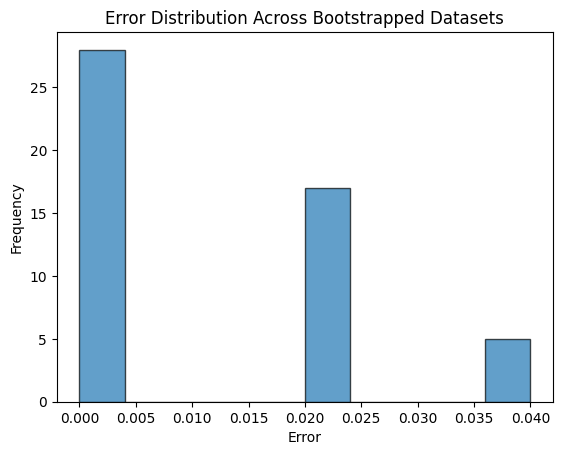

In [71]:
plt.hist(error_list, bins=10, edgecolor='k', alpha=0.7)
plt.title('Error Distribution Across Bootstrapped Datasets')
plt.xlabel('Error')
plt.ylabel('Frequency')
plt.show()

In [72]:
print(get_accuracy(predictions, y_test))

[[1. 1. 0. 1. 0. 1. 0. 1. 0. 0. 0. 1. 1. 1. 1. 0. 1. 0. 1. 0. 1. 1. 1. 0.
  1. 0. 0. 1. 0. 0. 1. 1. 1. 0. 1. 1. 0. 1. 0. 0. 0. 0. 1. 0. 0. 0. 1. 0.
  0. 1.]] [[1. 1. 0. 1. 0. 1. 0. 1. 0. 0. 0. 1. 1. 1. 1. 0. 1. 0. 1. 0. 1. 1. 1. 0.
  1. 0. 0. 1. 0. 0. 1. 1. 1. 0. 1. 1. 0. 1. 0. 0. 0. 0. 1. 0. 0. 0. 1. 0.
  0. 1.]]
1.0


In [73]:
print(error_list)

[0.020000000000000018, 0.0, 0.0, 0.020000000000000018, 0.0, 0.0, 0.0, 0.0, 0.020000000000000018, 0.020000000000000018, 0.020000000000000018, 0.040000000000000036, 0.0, 0.0, 0.0, 0.020000000000000018, 0.020000000000000018, 0.020000000000000018, 0.0, 0.0, 0.0, 0.0, 0.020000000000000018, 0.040000000000000036, 0.020000000000000018, 0.020000000000000018, 0.0, 0.020000000000000018, 0.0, 0.0, 0.0, 0.0, 0.0, 0.040000000000000036, 0.020000000000000018, 0.0, 0.0, 0.0, 0.0, 0.020000000000000018, 0.0, 0.020000000000000018, 0.020000000000000018, 0.0, 0.040000000000000036, 0.020000000000000018, 0.0, 0.0, 0.040000000000000036, 0.0]


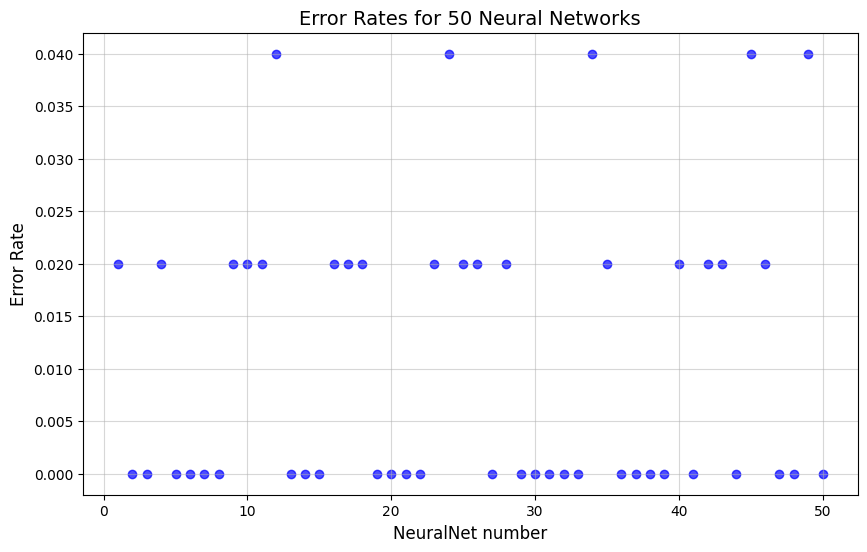

In [82]:
plt.figure(figsize=(10, 6))
plt.scatter(range(1, 51), error_list, color='blue', alpha=0.7)
plt.title('Error Rates for 50 Neural Networks', fontsize=14)
plt.xlabel('NeuralNet number', fontsize=12)
plt.ylabel('Error Rate', fontsize=12)
plt.grid(alpha=0.5)
plt.show()

(c) Using bagging with ensemble size m €- {5, 10, 15, 20} to design new binary classifiers. We Plot the
error rate of the new classifiers as a function of ensemble size m.

In [78]:
ensemble_sizes = [5, 10, 15, 20]
ensemble_errors = []

for m in ensemble_sizes:
    all_predictions = []

    for i in range(m):
        dataset = bootstrap_dataset[i]
        x_train, y_train = dataset[:, :-1].T, dataset[:, -1:].T

        W1, b1, W2, b2 = initialize_parameters(x_train.shape[0], hidden_units, y_train.shape[0])

        for epoch in range(epochs):
            Z1, A1, Z2, A2 = forward_propagation(x_train, W1, b1, W2, b2)
            dW1, db1, dW2, db2 = backward_propagation(x_train, y_train, Z1, A1, Z2, A2, W1, b1, W2, b2)
            W1, b1, W2, b2 = update_parameters(W1, b1, W2, b2, dW1, db1, dW2, db2, learning_rate)

        x_test, y_test = moon_test[:, :-1].T, moon_test[:, -1].reshape(1, -1)
        _, _, Z2_test, A2_test = forward_propagation(x_test, W1, b1, W2, b2)
        predictions = get_predictions(A2_test)
        all_predictions.append(predictions)

    all_predictions = np.array(all_predictions)

    ensemble_predictions = np.round(np.mean(all_predictions, axis=0))

    ensemble_error = 1 - get_accuracy(ensemble_predictions, y_test.flatten())
    ensemble_errors.append(ensemble_error)

[[1. 1. 0. 1. 0. 1. 0. 1. 0. 0. 0. 1. 1. 1. 1. 0. 1. 0. 1. 0. 1. 1. 1. 0.
  1. 0. 0. 1. 0. 0. 1. 1. 1. 0. 1. 1. 0. 1. 0. 0. 0. 0. 1. 0. 0. 0. 1. 0.
  0. 1.]] [1. 1. 0. 1. 0. 1. 0. 1. 0. 0. 0. 1. 1. 1. 1. 0. 1. 0. 1. 0. 1. 1. 1. 0.
 1. 0. 0. 1. 0. 0. 1. 1. 1. 0. 1. 1. 0. 1. 0. 0. 0. 0. 1. 0. 0. 0. 1. 0.
 0. 1.]
[[1. 1. 0. 1. 0. 1. 0. 1. 0. 0. 0. 1. 1. 1. 1. 0. 1. 0. 1. 0. 1. 1. 1. 0.
  1. 0. 0. 1. 0. 0. 1. 1. 1. 0. 1. 1. 0. 1. 0. 0. 0. 0. 1. 0. 0. 0. 1. 0.
  0. 1.]] [1. 1. 0. 1. 0. 1. 0. 1. 0. 0. 0. 1. 1. 1. 1. 0. 1. 0. 1. 0. 1. 1. 1. 0.
 1. 0. 0. 1. 0. 0. 1. 1. 1. 0. 1. 1. 0. 1. 0. 0. 0. 0. 1. 0. 0. 0. 1. 0.
 0. 1.]
[[1. 1. 0. 1. 0. 1. 0. 1. 0. 0. 0. 1. 1. 1. 1. 0. 1. 0. 1. 0. 1. 1. 1. 0.
  1. 0. 0. 1. 0. 0. 1. 1. 1. 0. 1. 1. 0. 1. 0. 0. 0. 0. 1. 0. 0. 0. 1. 0.
  0. 1.]] [1. 1. 0. 1. 0. 1. 0. 1. 0. 0. 0. 1. 1. 1. 1. 0. 1. 0. 1. 0. 1. 1. 1. 0.
 1. 0. 0. 1. 0. 0. 1. 1. 1. 0. 1. 1. 0. 1. 0. 0. 0. 0. 1. 0. 0. 0. 1. 0.
 0. 1.]
[[1. 1. 0. 1. 0. 1. 0. 1. 0. 0. 0. 1. 1. 1. 1. 0. 1. 0. 1. 0. 1.

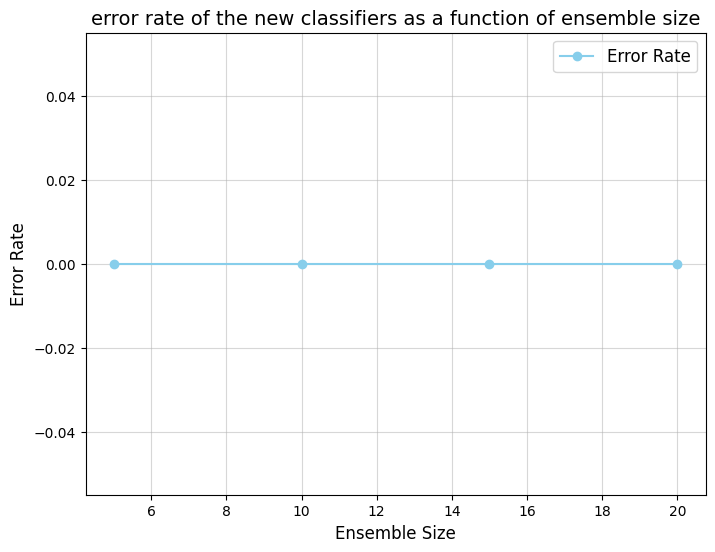

In [84]:
plt.figure(figsize=(8, 6))
plt.plot(ensemble_sizes, ensemble_errors, marker='o', color='skyblue', label='Error Rate')
plt.title('error rate of the new classifiers as a function of ensemble size', fontsize=14)
plt.xlabel('Ensemble Size', fontsize=12)
plt.ylabel('Error Rate', fontsize=12)
plt.grid(alpha=0.5)
plt.legend(fontsize=12)
plt.show()